In [2]:
!pip install import_ipynb
!pip install bayesian-optimization

import import_ipynb
from google.colab import drive

import os
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Intro to DS - Capstone/Code/src')
from utilities import *

Mounted at /content/gdrive


FileNotFoundError: ignored

# 3. Regression
In this notebook, we will explore different logistic regression methods to be able to build a model that classifies user's tendency to default on payment based on personal information and past credit history.


# 3.1 Reading and Preliminary Regression

In [5]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import metrics
import pandas as pd

#data = pd.read_excel('/content/gdrive/MyDrive/Intro to DS - Capstone/Data/Raw/default of credit card clients.xlsx', header = 1)
data = pd.read_excel('/content/default of credit card clients.xlsx')
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
#excluding PAY variables as that information is contained in the bill and paid amount
X = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = data[['default payment next month']]

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

KeyError: ignored

[[5863    5]
 [1631    1]]


Text(0.5, 257.44, 'Predicted label')

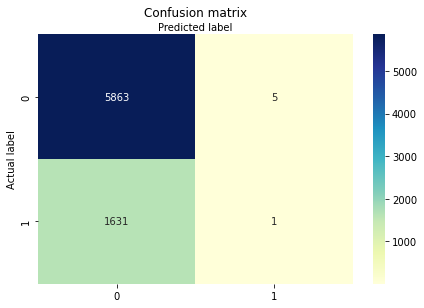

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7818666666666667
Precision: 0.16666666666666666
Recall: 0.0006127450980392157


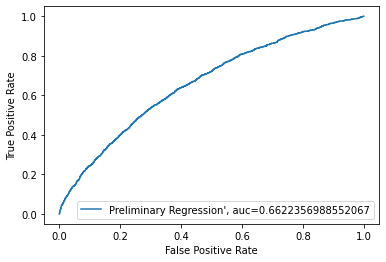

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Preliminary Regression', auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# 3.2 Data Exploration and Visualization
We will use StandardScaler() and PCA to visualize the data points in 2 dimensions to see how that data is split ad observe that many characteristics are present in both labels, and is hence tough to classify.

In [ ]:
#changing the 0/1 labels to be descriptive to ease undertanding
data['default payment next month'].replace(0, 'Duly Pay',inplace=True)
data['default payment next month'].replace(1, 'Default',inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# Separating out the features
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['default payment next month']]], axis = 1)
print(finalDf)

       principal component 1  principal component 2 default payment next month
0                  -1.887962              -0.906108                    Default
1                  -0.764696              -2.109287                    Default
2                  -0.847408              -1.072180                   Duly Pay
3                  -0.196589              -0.809022                   Duly Pay
4                  -0.840934              -0.072539                   Duly Pay
...                      ...                    ...                        ...
29995               2.523445               0.692642                   Duly Pay
29996              -1.775043              -0.051203                   Duly Pay
29997               0.357457              -3.312756                    Default
29998               0.650552               0.722902                    Default
29999              -0.145564              -0.809752                    Default

[30000 rows x 3 columns]


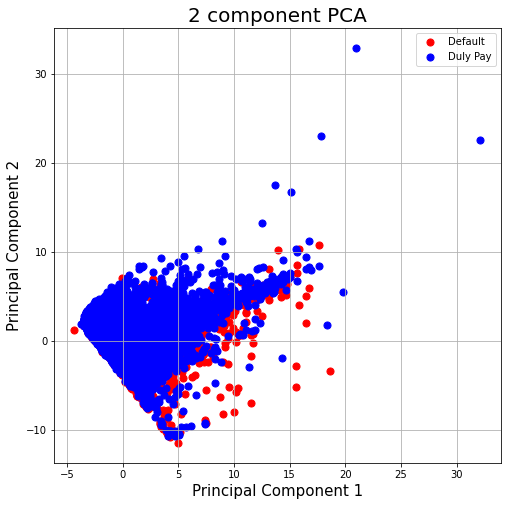

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Default', 'Duly Pay']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['default payment next month'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# 3.3 Logistic Regression with Feature Extraction and Standardization
We implement one-hot encoding and feature normalization to see if we get better accuracy and precision. 


In [ ]:

#excluding PAY variables as that information is contained in the bill and paid amount
X = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = data[['default payment next month']]

y['default payment next month'].replace('Duly Pay', 0, inplace=True)
y['default payment next month'].replace('Default', 1, inplace=True)

X['SEX'] = (X['SEX'] == 1).astype(float)
X['EDUCATION_1'] = (X['EDUCATION'] == 1).astype(float)
X['EDUCATION_2'] = (X['EDUCATION'] == 2).astype(float)
X['EDUCATION_3'] = (X['EDUCATION'] == 3).astype(float)
X['MARRIAGE_1'] = (X['MARRIAGE'] == 1).astype(float)
X['MARRIAGE_2'] = (X['MARRIAGE'] == 2).astype(float)
X.drop(columns =  ['EDUCATION', 'MARRIAGE'], inplace = True)

X['bill_amt'] = X[['BILL_AMT1',	'BILL_AMT2', 'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6']].mean(axis = 1)
X['pay_amt'] = X[['PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6' ]].mean(axis = 1)

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train_scaled)

train_img = pca.transform(X_train_scaled)
test_img = pca.transform(X_test_scaled)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_scaled,y_train)

y_pred=logreg.predict(X_test_scaled)

[[5867    1]
 [1631    1]]


Text(0.5, 257.44, 'Predicted label')

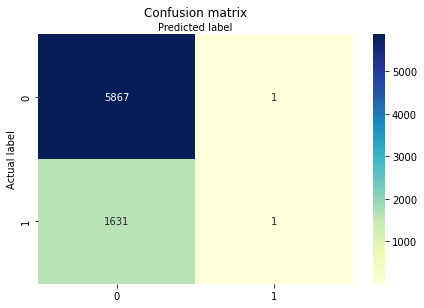

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7824
Precision: 0.5
Recall: 0.0006127450980392157


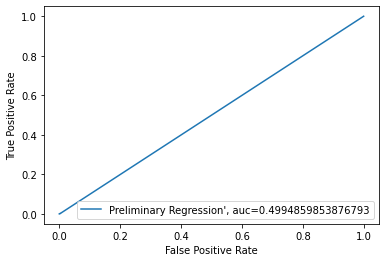

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Preliminary Regression', auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# 3.4 Support Vector Machines

Since logistic regression both using standardization and PCA yields low precision, due to the fact that only linear boundaries can be created, we will use various SVMs in hope of getting a better demarcation.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(principalDf, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=0.001) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7824
Precision: 0.0
Recall: 0.0


In [ ]:
clf = svm.SVC(kernel='rbf', C=0.001) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7824
Precision: 0.0
Recall: 0.0
